# OUTDATED!!!!!

In [1]:
import sys
import importlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
if sys.path[-1] != "..": sys.path.append("..")
import model
from common import cosmology, rh_neutrino, constants, constraints
model = importlib.reload(model)
cosmology = importlib.reload(cosmology)

In [2]:
def calc_effective_mass(coupling, other_field, fundermental_mass):
    return np.sqrt(fundermental_mass**2 + coupling * other_field**2)

In [3]:
def make_bg_plots(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g, **kwargs):
    sol = model.simulate(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g=g, **kwargs)

    plt.loglog(sol.t, cosmology.n_L_to_eta_B_final(sol.T, sol.n_L))
    plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
    plt.ylabel(r"Asymmetry, $\eta_B$")
    plt.show()

    plt.semilogx(sol.t, sol.theta, label=r"Axion, $a / a_0$")
    plt.semilogx(sol.t, sol.chi / chi0, label=r"Helper, $\chi / \chi_0$")
    plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
    plt.ylabel(r"Normalized Field Value")
    plt.legend()
    plt.show()

    sigma_eff = rh_neutrino.paper_sigma_eff
    plt.loglog(sol.t, rh_neutrino.calc_Gamma_L(sol.T, sigma_eff))
    plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
    plt.ylabel(r"Lepton Rate, $\Gamma_L / \mathrm{GeV}$")
    plt.show()

    plt.loglog(sol.t, sol.H, label=r"Hubble Parameter, $H$")
    la, = plt.loglog(sol.t, calc_effective_mass(g, sol.chi, m_a), label=r"Eff. Axion Mass, $m_\mathrm{a,eff}$")
    lh, = plt.loglog(sol.t, calc_effective_mass(g, f_a * sol.theta, m_chi), 
               label=r"Eff. Helper Field Mass, $m_\mathrm{\chi,eff}$")
    plt.axhline(m_a, color=la.get_color(), ls="--", label="Fund. Axion Mass")
    plt.axhline(m_chi, color=lh.get_color(), ls="--", label=r"Fund. $\chi$ Mass")
    plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
    plt.ylabel("Energy / GeV")
    plt.legend()
    plt.show()
    
    return sol

In [65]:
f_a = 1e6
m_chi = 1e6
m_a = 1e3 # this is irrelevant 
H_inf = 2e10
chi0_range = np.geomspace(5e5, 1e9, 10)
Gamma_phi_range = np.geomspace(5e5, 1e10, 10)
eta_B = np.array([[model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi) 
                    for chi0 in chi0_range] for Gamma_phi in tqdm(Gamma_phi_range)])

In [61]:
def plot_eta_B_contour(eta_B, x_range, y_range,
                      xlabel=r"$\chi_0 / \mathrm{GeV}$", ylabel=r"$\Gamma_\phi / \mathrm{GeV}$",
                      title=None):
    vals = eta_B.reshape(-1)
    pows = np.log10(vals[np.isfinite(vals) & (vals > 0)])
    min_level = np.round(np.min(pows))
    max_level = np.round(np.max(pows))
    levels = np.sort(np.concatenate([np.arange(min_level, max_level + 1), [np.log10(constants.eta_B_observed)]]))

    CS2 = plt.contour(x_range, y_range, np.log10(eta_B), levels=levels)
    plt.colorbar().set_label(r"$\log_{10} \eta_B^0$")
    CS2.collections[np.where(CS2.levels == np.log10(model.eta_B_observed))[0][0]].set_color("red")

    plt.xscale("log"); plt.yscale("log")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.title(title)

<ipython-input-61-e8dcdf647d2f>:10: RuntimeWarning: invalid value encountered in log10
  CS2 = plt.contour(x_range, y_range, np.log10(eta_B), levels=levels)


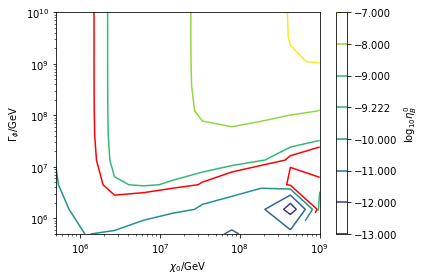

In [66]:
plot_eta_B_contour(eta_B, chi0_range, Gamma_phi_range)

In [69]:
cosmology.calc_start_time(constraints.calc_H_inf_max(f_a)) 

0.0016666666666666668

In [18]:
constraints.calc_H_inf_max??
# H_inf^max = 6e11 * (f_a / 1e15) > chi0
chi0_max =  * 1e15 / 6e11

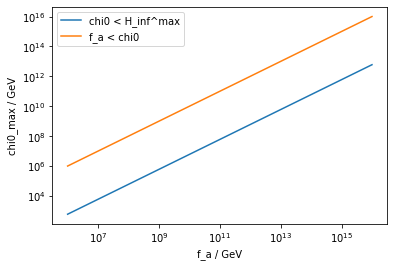

In [24]:
Gamma_phi = 1e7
f_a_range = np.geomspace(1e6, 1e16, 100)
chi0 = np.geomspace(1, 1e16, 100)
ff, chichi = np.meshgrid(f_a_range, chi0)
H_inf_max = constraints.calc_H_inf_max(ff)
#plt.pcolormesh(f_a_range, chi0, ff < chichi, cmap="winter", alpha=0.5)
plt.plot(f_a_range, constraints.calc_H_inf_max(f_a_range), label="chi0 < H_inf^max")
plt.plot(f_a_range, f_a_range, label="f_a < chi0")
plt.plot(f_a_range, )
plt.xscale("log"); plt.yscale("log")
plt.xlabel("f_a / GeV")
plt.ylabel("chi0_max / GeV")
plt.legend()

axion soll nicht softor oszillieren
chi0 < H_inf -- because m_a << chi0
chi should not oscillate
f_a < H_inf (*)
and m_chi < H_inf

f_a < chi0
H_inf_max =  6e-4 * f_a < f_a 
H_inf_max' =  6e-4 * chi0 < 0
from (*) : H_inf_max = 6e-4 * f_a
H_inf < H_inf_max
H_inf > Gamma_phi
easy:
H_inf > m_a
H_inf > m_chi

In [ ]:
min(1,2)

In [35]:
H_inf_max

600.0

In [36]:
f_a = 1e6
chi0 = 1e6
H_inf_max = min(constraints.calc_H_inf_max(f_a), constraints.calc_H_inf_max(chi0))
# H_inf_max is always be larger than f_a and chi0! ==> The field will oscillate right at the end of inflation
# ===> no leptogenesis 
start = cosmology.calc_start_time(H_inf_max)
make_bg_plots(m_a=1e-3, m_chi=1e-3, g=1.0, chi0=chi0, f_a=f_a, 
              Gamma_phi=H_inf_max, H_inf=H_inf_max, end=1.0001*start)

KeyboardInterrupt: 

In [9]:
f_a = 1e6
chi0 = 500
Gamma_phi = 1e7
H_inf = constraints.calc_H_inf_max(f_a)
start = cosmology.calc_start_time(H_inf)
print("start =", start)
print("H_inf =", H_inf)

sol = make_bg_plots(m_a=1e3, f_a=f_a, Gamma_phi=Gamma_phi, 
                H_inf=H_inf, chi0=chi0, m_chi=1e3, g=1.0,
                converge=False, end=start*10)

start = 0.0016666666666666668
H_inf = 600.0
